In [71]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd
import numpy as np 
import scipy.stats as stats
data_df = pd.read_csv('../../datasets/House_Prices_train.csv')
data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
numeric_columns = data_df.select_dtypes(include=['int64', 'float64']).columns
numeric_data_df = data_df[numeric_columns]
numeric_data_df = numeric_data_df.dropna()
numeric_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   int64  
 1   MSSubClass     1121 non-null   int64  
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   int64  
 4   OverallQual    1121 non-null   int64  
 5   OverallCond    1121 non-null   int64  
 6   YearBuilt      1121 non-null   int64  
 7   YearRemodAdd   1121 non-null   int64  
 8   MasVnrArea     1121 non-null   float64
 9   BsmtFinSF1     1121 non-null   int64  
 10  BsmtFinSF2     1121 non-null   int64  
 11  BsmtUnfSF      1121 non-null   int64  
 12  TotalBsmtSF    1121 non-null   int64  
 13  1stFlrSF       1121 non-null   int64  
 14  2ndFlrSF       1121 non-null   int64  
 15  LowQualFinSF   1121 non-null   int64  
 16  GrLivArea      1121 non-null   int64  
 17  BsmtFullBath   1121 non-null   int64  
 18  BsmtHalfBath 

### 상관 관계 확인
- GarageYrBlt    GarageArea     0.592635  
- YearRemodAdd     SalePrice     0.521253
- YearRemodAdd   GarageYrBlt     0.645808    
- 상관 관계가 0.5 이상인 3쌍의 결과를 보고자 함.  

In [73]:
# 상관계수가 높은 쌍 찾기
corr_df = numeric_data_df.corr()
high_corr_pairs = []

for i in range(len(corr_df.columns)):
    for j in range(i + 1, len(corr_df.columns)):
        correlation = corr_df.iloc[i, j]
        if abs(correlation) >= 0.5:
        # if correlation <= -0.1:
            col1 = corr_df.columns[i]
            col2 = corr_df.columns[j]
            high_corr_pairs.append({
                'Column 1': col1,
                'Column 2': col2,
                'Correlation': correlation,
                'Abs Correlation': abs(correlation)
            })

# 결과를 DataFrame으로 변환하고 절대값 기준으로 정렬
result_df = pd.DataFrame(high_corr_pairs).sort_values(by='Abs Correlation', ascending=False)
print(result_df)

        Column 1      Column 2  Correlation  Abs Correlation
42    GarageCars    GarageArea     0.839415         0.839415
20   TotalBsmtSF      1stFlrSF     0.835999         0.835999
32     GrLivArea  TotRmsAbvGrd     0.824312         0.824312
12     YearBuilt   GarageYrBlt     0.823520         0.823520
9    OverallQual     SalePrice     0.797881         0.797881
33     GrLivArea     SalePrice     0.705154         0.705154
26      2ndFlrSF     GrLivArea     0.688292         0.688292
19    BsmtFinSF1  BsmtFullBath     0.651727         0.651727
37  BedroomAbvGr  TotRmsAbvGrd     0.650285         0.650285
43    GarageCars     SalePrice     0.647034         0.647034
15  YearRemodAdd   GarageYrBlt     0.645808         0.645808
10     YearBuilt  YearRemodAdd     0.623171         0.623171
44    GarageArea     SalePrice     0.619330         0.619330
29      2ndFlrSF  TotRmsAbvGrd     0.617776         0.617776
22   TotalBsmtSF     SalePrice     0.615612         0.615612
30     GrLivArea      Fu

In [74]:

# GarageYrBlt    GarageArea     0.592635  
# YearRemodAdd     SalePrice     0.521253
# YearRemodAdd   GarageYrBlt     0.645808        
# - GarageYrBlt
# - GarageArea 0.564567
# - YearRemodAdd
# - SalePrice 0.507101

# GarageCars    GarageArea
# OverallQual    GarageCars
# 2ndFlrSF  BedroomAbvGr
# - GarageCars    
# - GarageArea
# - OverallQual    
# - GarageCars
# - 2ndFlrSF  
# - BedroomAbvGr
# - TotRmsAbvGrd

### spearman 검정 결과
- 귀무가설: GarageYrBlt GarageArea 간에 관계가 없다
- 대립가설: GarageYrBlt GarageArea 간에 관계가 있다
- 검정 결과:
p-value = 2.32e-124 < 0.05
- 대립가설 성립
- 사실가설 : GarageYrBlt 따라 GarageArea 달라진다 ?

### spearman 검정 결과
- 귀무가설: YearRemodAdd SalePrice 간에 관계가 없다
- 대립가설: YearRemodAdd SalePrice 간에 관계가 있다
- 검정 결과:
p-value = 1.01e-118 < 0.05
- 대립가설 성립
- 사실가설 : YearRemodAdd 따라 SalePrice 달라진다 ?

### spearman 검정 결과
- 귀무가설: YearRemodAdd GarageYrBlt 간에 관계가 없다
- 대립가설: YearRemodAdd GarageYrBlt 간에 관계가 있다
- 검정 결과:
p-value = 2.00e-195 < 0.05
- 대립가설 성립
- 사실가설 : YearRemodAdd 따라 GarageYrBlt 달라진다 ?

### pearson test 

In [ ]:
# GarageYrBlt    GarageArea     0.564567 
# YearRemodAdd     SalePrice     0.507101
# YearRemodAdd   GarageYrBlt     0.642277  

In [75]:
stats.pearsonr(numeric_data_df['GarageYrBlt'], numeric_data_df['GarageArea'])

PearsonRResult(statistic=0.5926352461560301, pvalue=2.976807076626612e-107)

In [76]:
stats.pearsonr(numeric_data_df['YearRemodAdd'], numeric_data_df['SalePrice'])


PearsonRResult(statistic=0.5212532703794038, pvalue=4.171636654478638e-79)

In [77]:
stats.pearsonr(numeric_data_df['YearRemodAdd'], numeric_data_df['GarageYrBlt'])


PearsonRResult(statistic=0.6458084677957082, pvalue=2.6900292579312534e-133)

### spearman test 진행


In [78]:
stats.spearmanr(numeric_data_df['GarageYrBlt'], numeric_data_df['GarageArea'])

SignificanceResult(statistic=0.6286948039658112, pvalue=2.329298112625989e-124)

In [79]:
stats.spearmanr(numeric_data_df['YearRemodAdd'], numeric_data_df['SalePrice'])


SignificanceResult(statistic=0.6173111892164376, pvalue=1.0198029818398026e-118)

In [80]:
stats.spearmanr(numeric_data_df['YearRemodAdd'], numeric_data_df['GarageYrBlt'])


SignificanceResult(statistic=0.7405920610019816, pvalue=2.000492519726849e-195)

### 정규 분포 여부 
- 아래 컬럼들은 p-value 값이 모두 0.05 보다 작으므로 비정규 분포에 포함된다.
- GarageYrBlt
- GarageArea
- YearRemodAdd
- SalePrice

In [81]:
stats.shapiro(x=numeric_data_df['GarageYrBlt'])

ShapiroResult(statistic=0.9107807295068578, pvalue=4.0958521649773303e-25)

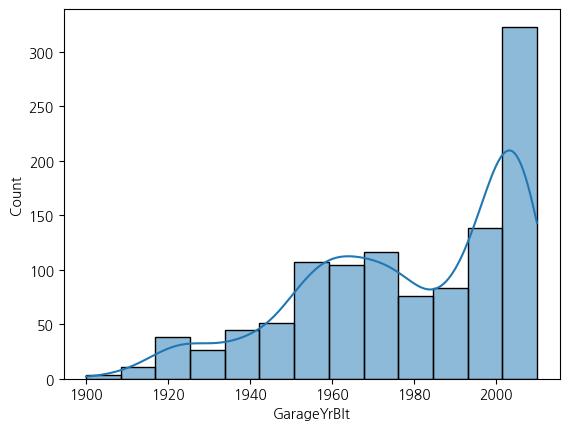

In [82]:
sns.histplot(data=numeric_data_df, x='GarageYrBlt',kde=True)
plt.show()

In [83]:
stats.shapiro(x=numeric_data_df['GarageArea'])


ShapiroResult(statistic=0.9609336501539587, pvalue=9.289853287255519e-17)

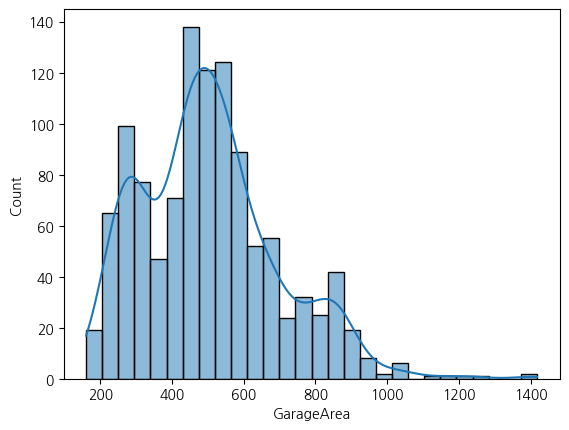

In [84]:
sns.histplot(data=numeric_data_df, x='GarageArea',kde=True)
plt.show()

In [85]:
stats.shapiro(x=numeric_data_df['YearRemodAdd'])


ShapiroResult(statistic=0.8442889285436015, pvalue=8.963280657991543e-32)

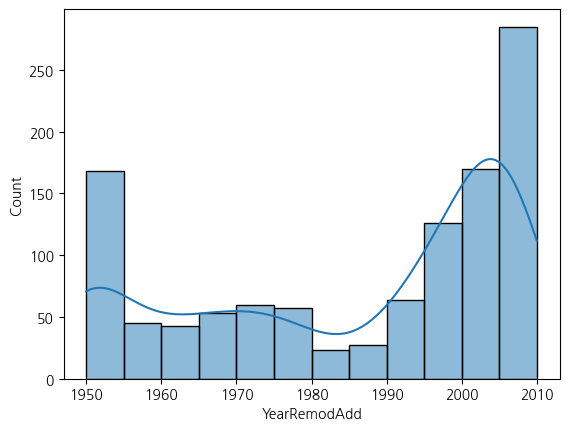

In [86]:
sns.histplot(data=numeric_data_df, x='YearRemodAdd',kde=True)
plt.show()

In [87]:
stats.shapiro(x=numeric_data_df['SalePrice'])


ShapiroResult(statistic=0.8561443420381314, pvalue=8.911584969864257e-31)

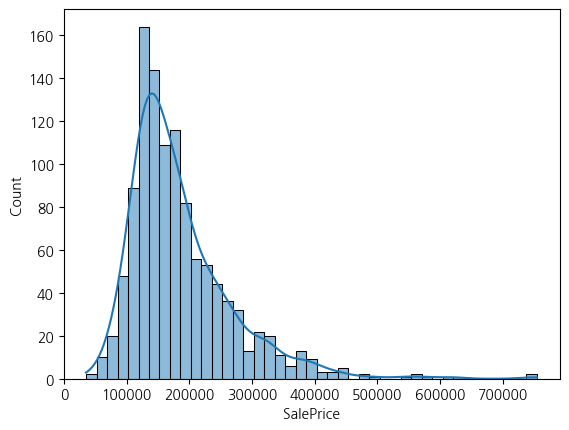

In [88]:
sns.histplot(data=numeric_data_df, x='SalePrice',kde=True)
plt.show()

In [89]:
results = stats.anderson(numeric_data_df['GarageYrBlt'])
results

AndersonResult(statistic=31.399117864146547, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1978.399643175736, scale=25.822833193866956)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [90]:
results.significance_level, results.critical_values

(array([15. , 10. ,  5. ,  2.5,  1. ]),
 array([0.574, 0.654, 0.784, 0.915, 1.088]))

In [91]:
results = stats.anderson(numeric_data_df['GarageArea'])
results

AndersonResult(statistic=9.11348550870207, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=502.95539696699376, scale=191.2430432204574)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [92]:
results.significance_level, results.critical_values

(array([15. , 10. ,  5. ,  2.5,  1. ]),
 array([0.574, 0.654, 0.784, 0.915, 1.088]))

In [93]:
results = stats.anderson(numeric_data_df['YearRemodAdd'])
results

AndersonResult(statistic=65.0559627366033, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1985.6833184656557, scale=21.02597411653933)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [94]:
results.significance_level, results.critical_values

(array([15. , 10. ,  5. ,  2.5,  1. ]),
 array([0.574, 0.654, 0.784, 0.915, 1.088]))

In [95]:
results = stats.anderson(numeric_data_df['SalePrice'])
results

AndersonResult(statistic=37.78039907239554, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=185506.15254237287, scale=82999.15900446841)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [96]:
results.significance_level, results.critical_values


(array([15. , 10. ,  5. ,  2.5,  1. ]),
 array([0.574, 0.654, 0.784, 0.915, 1.088]))